Dataset: Text Document Classification Dataset <br>
Link dataset: [Link](https://www.kaggle.com/datasets/sunilthite/text-document-classification-dataset) <br>
Jumlah Baris: 2225 baris <br>
Jumlah Kolom: 2 kolom <br>
Jumlah Label: 5
1. Politics = 0
2. Sport = 1
3. Technology = 2
4. Entertainment =3
5. Business = 4

This is text document classification dataset which contains 2225 text data and five categories of documents. Five categories are politics, sport, tech, entertainment and business. We can use this dataset for documents classification and document clustering.

Dataset ini merupakan teks dokumen klasifikasi yang memiliki 2225 data teks dan 5 kategori/label dokumen. 5 kategori/label tersebut adalah politik, olahraga, teknologi, entertaimen dan bisnis. Dokumen ini dapat digunakan untuk klasifikasi dokumen dan clustering dokumen.

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [2]:
import pandas as pd
df = pd.read_csv('df_file.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [4]:
df.shape

(2225, 2)

In [5]:
df.describe()

,Label
count,2225.000000
mean,2.027416
std,1.438694
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [6]:
df.groupby('Label').size()

Label
0    417
1    511
2    401
3    386
4    510
dtype: int64

In [7]:
df

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0
...,...,...
2220,India opens skies to competition\n \n India wi...,4
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...,4
2222,Survey confirms property slowdown\n \n Governm...,4
2223,High fuel prices hit BA's profits\n \n British...,4


In [8]:
kategori = pd.get_dummies(df.Label)
df_baru = pd.concat([df, kategori], axis=1)
df_baru = df_baru.drop(columns='Label')
df_baru

,Text,0,1,2,3,4
0,Budget to set scene for election\n \n Gordon B...,1,0,0,0,0
1,Army chiefs in regiments decision\n \n Militar...,1,0,0,0,0
2,Howard denies split over ID cards\n \n Michael...,1,0,0,0,0
3,Observers to monitor UK election\n \n Minister...,1,0,0,0,0
4,Kilroy names election seat target\n \n Ex-chat...,1,0,0,0,0
...,...,...,...,...,...,...
2220,India opens skies to competition\n \n India wi...,0,0,0,0,1
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...,0,0,0,0,1
2222,Survey confirms property slowdown\n \n Governm...,0,0,0,0,1
2223,High fuel prices hit BA's profits\n \n British...,0,0,0,0,1


In [9]:
df_baru['Text'][0]

'Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n  - A freeze on petrol duty \n  - An extension of tax credit scheme for poorer families \n  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buyers had a much g

In [10]:
teks = df_baru['Text'].values
label = df_baru[[0, 1, 2, 3, 4]].values

In [11]:
label[0]

array([1, 0, 0, 0, 0], dtype=uint8)

In [12]:
teks[0]

'Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n  - A freeze on petrol duty \n  - An extension of tax credit scheme for poorer families \n  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buyers had a much g

In [13]:
import re
import numpy as np
teks_regex = np.array([re.sub('\W+',' ', x.lower()) for x in df_baru['Text']])

In [14]:
teks_regex[0]

'budget to set scene for election gordon brown will seek to put the economy at the centre of labour s bid for a third term in power when he delivers his ninth budget at 1230 gmt he is expected to stress the importance of continued economic stability with low unemployment and interest rates the chancellor is expected to freeze petrol duty and raise the stamp duty threshold from â 60 000 but the conservatives and lib dems insist voters face higher taxes and more means testing under labour treasury officials have said there will not be a pre election giveaway but mr brown is thought to have about â 2bn to spare increase in the stamp duty threshold from â 60 000 a freeze on petrol duty an extension of tax credit scheme for poorer families possible help for pensioners the stamp duty threshold rise is intended to help first time buyers a likely theme of all three of the main parties general election manifestos ten years ago buyers had a much greater chance of avoiding stamp duty with close t

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

teks_bersih = np.array([x for x in teks_regex if not x in stop_words])

In [17]:
teks_bersih[0]

'budget to set scene for election gordon brown will seek to put the economy at the centre of labour s bid for a third term in power when he delivers his ninth budget at 1230 gmt he is expected to stress the importance of continued economic stability with low unemployment and interest rates the chancellor is expected to freeze petrol duty and raise the stamp duty threshold from â 60 000 but the conservatives and lib dems insist voters face higher taxes and more means testing under labour treasury officials have said there will not be a pre election giveaway but mr brown is thought to have about â 2bn to spare increase in the stamp duty threshold from â 60 000 a freeze on petrol duty an extension of tax credit scheme for poorer families possible help for pensioners the stamp duty threshold rise is intended to help first time buyers a likely theme of all three of the main parties general election manifestos ten years ago buyers had a much greater chance of avoiding stamp duty with close t

In [18]:
from sklearn.model_selection import train_test_split
teks_latih, teks_test, label_latih, label_test = train_test_split(teks_bersih, label, test_size=0.2, random_state=123, shuffle=True)

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=26645, oov_token='<oov>')
tokenizer.fit_on_texts(teks_latih)

sekuens_latih = tokenizer.texts_to_sequences(teks_latih)
sekuens_test = tokenizer.texts_to_sequences(teks_test)

max_seqlatih = min([len(sen) for sen in sekuens_latih])
print(max_seqlatih)
max_seqtest = min([len(sen) for sen in sekuens_latih])
print(max_seqtest)

padded_latih = pad_sequences(sekuens_latih, padding='post', truncating='post', maxlen=max_seqlatih)
padded_test = pad_sequences(sekuens_test, padding='post', truncating='post', maxlen=max_seqtest)

91
91


In [20]:
# disini pertama saya run kode diatas kemudian print kode dibawah untuk menentukan num_words
# karena menurut artikel yang saya baca https://medium.com/analytics-vidhya/understanding-nlp-keras-tokenizer-class-arguments-with-example-551c100f0cbd
# "best value is to use for the num_words is “len(tokenizer.word_index) + 1" ".
# kemudian saya run ulang kode diatas dengan mengganti num_words
# menjadi sesuai dengan “len(tokenizer.word_index) + 1"
max_input = len(tokenizer.word_index) + 1

In [21]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_input, output_dim=128, input_length=max_seqlatih),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(96, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 91, 128)           3410560   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 96)                12384     
                                                                 
 dropout_1 (Dropout)         (None, 96)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 485       
                                                                 
Total params: 3555013 (13.56 MB)
Trainable params: 35550

In [22]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92 and logs.get('val_loss')<0.3):
      print("\nAkurasi dan Val Akurasi telah mencapai >92%! serta val loss dibawah 30%")
      self.model.stop_training = True
callbacks = myCallback()

In [23]:
num_epochs = 300
history = model.fit(padded_latih, label_latih, epochs=num_epochs, batch_size=32,
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/300
56/56 - 10s - loss: 1.5262 - accuracy: 0.2994 - val_loss: 1.2857 - val_accuracy: 0.4225 - 10s/epoch - 173ms/step
Epoch 2/300
56/56 - 7s - loss: 0.9783 - accuracy: 0.6124 - val_loss: 0.9057 - val_accuracy: 0.6202 - 7s/epoch - 119ms/step
Epoch 3/300
56/56 - 7s - loss: 0.7318 - accuracy: 0.6781 - val_loss: 0.7586 - val_accuracy: 0.6337 - 7s/epoch - 126ms/step
Epoch 4/300
56/56 - 7s - loss: 0.5353 - accuracy: 0.8006 - val_loss: 0.6088 - val_accuracy: 0.7685 - 7s/epoch - 117ms/step
Epoch 5/300
56/56 - 8s - loss: 0.2733 - accuracy: 0.9258 - val_loss: 0.4894 - val_accuracy: 0.8270 - 8s/epoch - 147ms/step
Epoch 6/300
56/56 - 7s - loss: 0.1003 - accuracy: 0.9792 - val_loss: 0.3446 - val_accuracy: 0.8787 - 7s/epoch - 127ms/step
Epoch 7/300
56/56 - 7s - loss: 0.1574 - accuracy: 0.9567 - val_loss: 0.4245 - val_accuracy: 0.8652 - 7s/epoch - 117ms/step
Epoch 8/300
56/56 - 7s - loss: 0.0366 - accuracy: 0.9921 - val_loss: 0.3218 - val_accuracy: 0.8899 - 7s/epoch - 130ms/step
Epoch 9/300
56

In [24]:
import matplotlib.pyplot as plt

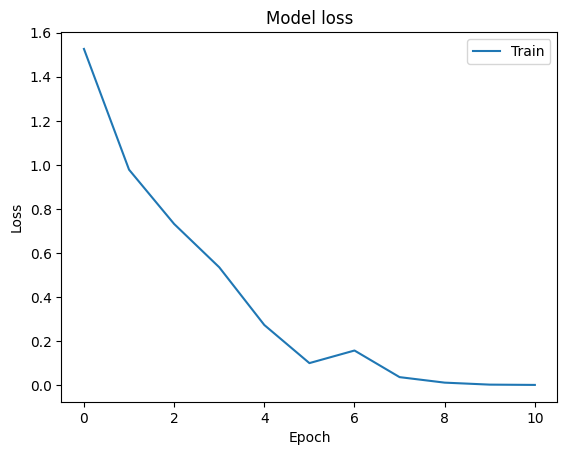

In [25]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

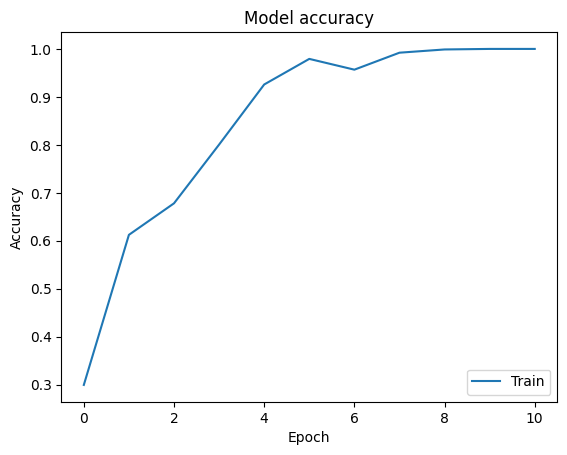

In [26]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

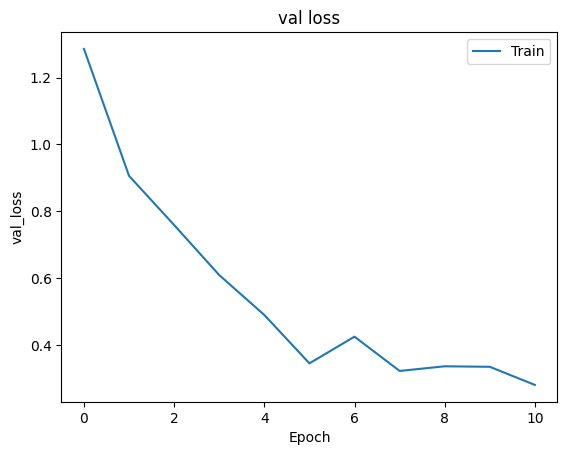

In [27]:
plt.plot(history.history['val_loss'])
plt.title('val loss')
plt.ylabel('val_loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

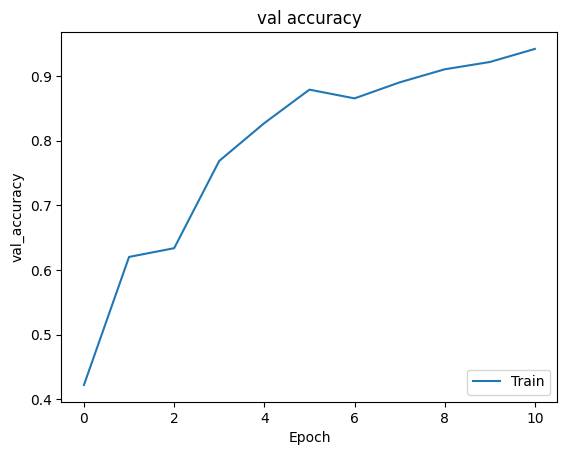

In [28]:
plt.plot(history.history['val_accuracy'])
plt.title('val accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()